<a href="https://colab.research.google.com/github/acotterson/MLTeam3/blob/Alec/bank2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [2]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [3]:
campaign.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
uncontacted_campaign = campaign[campaign['pdays']==999]
contacted_campaign = campaign[campaign['pdays']!=999]
contacted_campaign['y'].value_counts()

yes    967
no     548
Name: y, dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

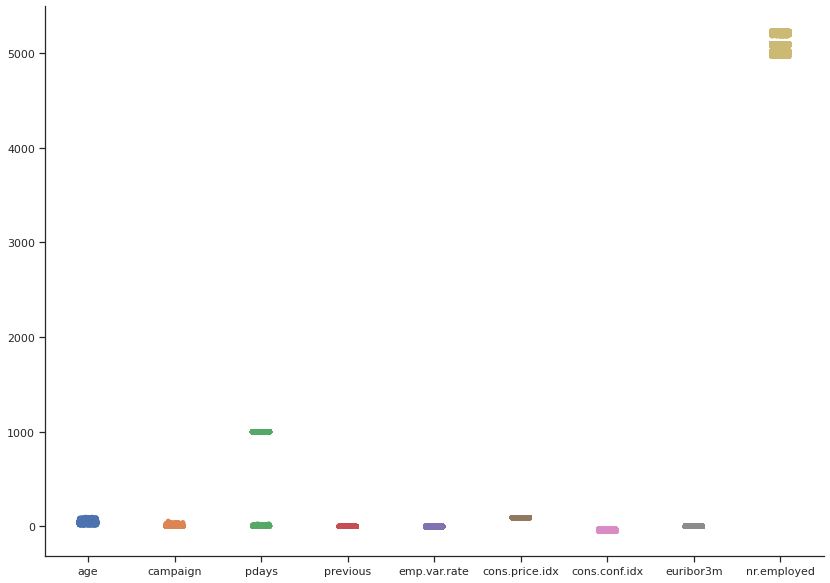

In [6]:
sns.catplot(data=campaign, height=8.27, aspect=11.7/8.27)

In [7]:
# campSansEmployed = campaign.drop(['nr.employed'], axis=1)
# sns.catplot(data=campSansEmployed, height=8.27, aspect=11.7/8.27)

In [8]:
# campSansEmployedPdays = campaign.drop(['nr.employed','pdays'], axis=1)
# sns.catplot(data=campSansEmployedPdays, height=8.27, aspect=11.7/8.27)

In [9]:
# campSansEmployedPdays = campaign.drop(['nr.employed','pdays'], axis=1)
# sns.catplot(data=campSansEmployedPdays, height=8.27, aspect=11.7/8.27)

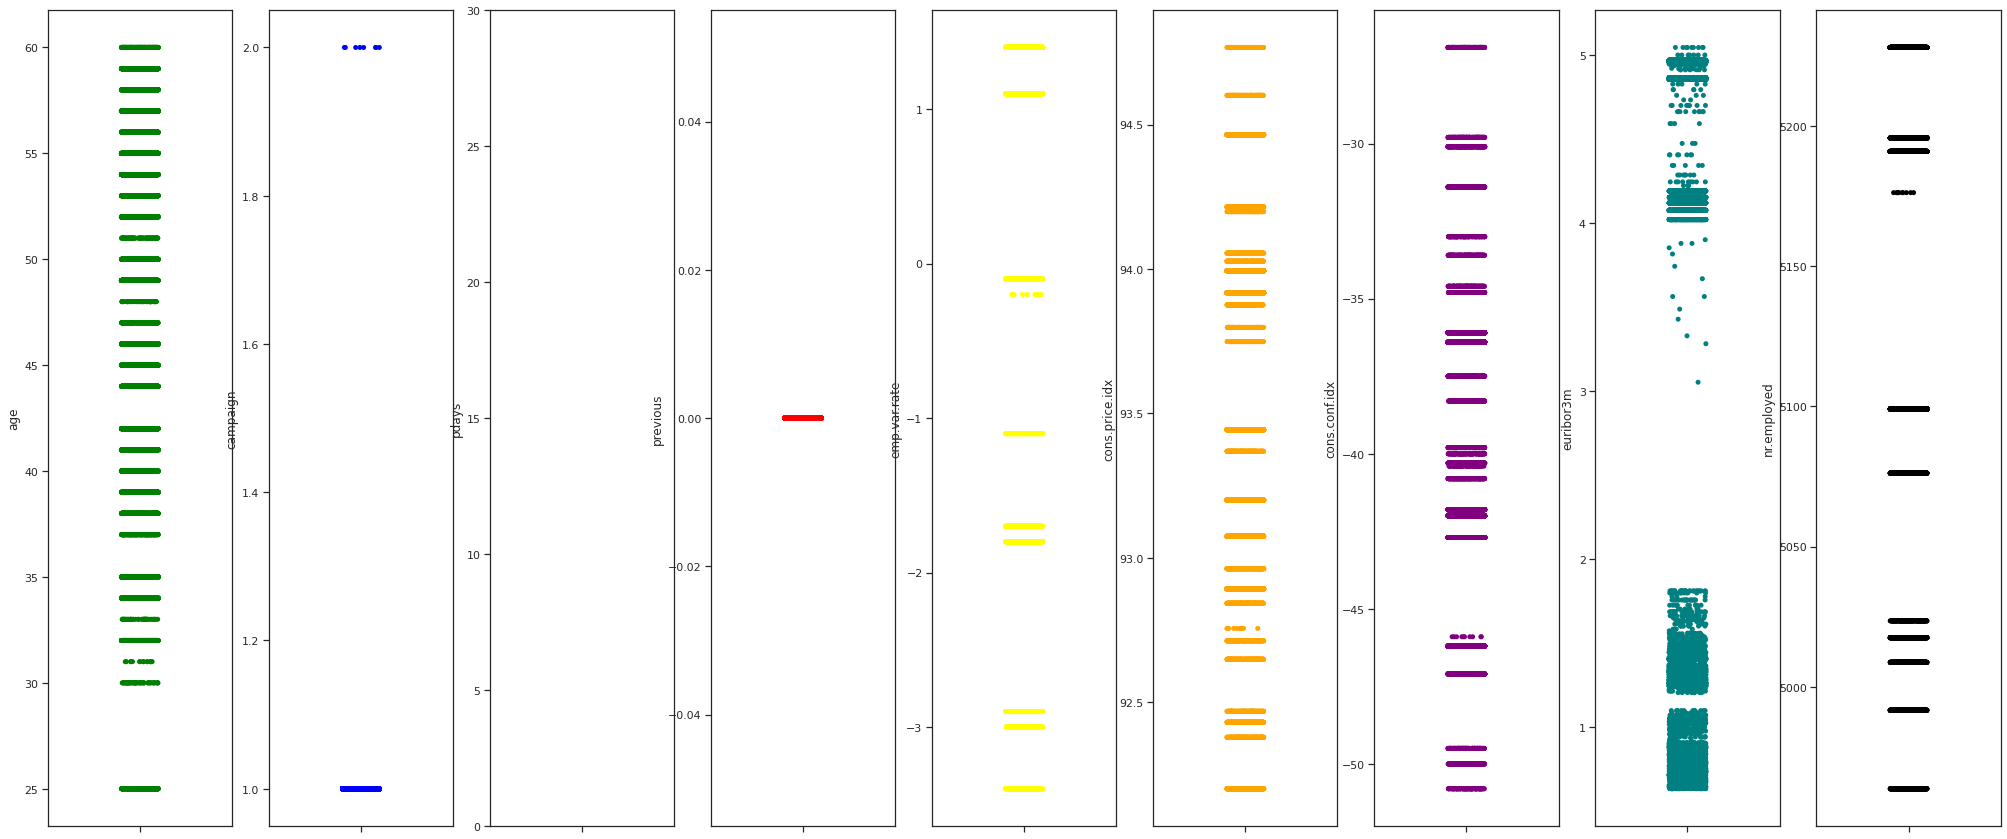

In [12]:
fig, axes = plt.subplots(1, 9, figsize=(35, 15))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

sns.stripplot(data=campaign['age'], y=campaign['age'], ax=ax1, color='green')
sns.stripplot(data=campaign['campaign'], y=campaign['campaign'], ax=ax2, color='blue')
sns.stripplot(data=campaign['pdays'], y=campaign['pdays'], ax=ax3, color='crimson')
ax3.set(ylim=(0, 30))
sns.stripplot(data=campaign['previous'], y=campaign['previous'], ax=ax4, color='red')
sns.stripplot(data=campaign['emp.var.rate'], y=campaign['emp.var.rate'], ax=ax5, color='yellow')
sns.stripplot(data=campaign['cons.price.idx'], y=campaign['cons.price.idx'], ax=ax6, color='orange')
sns.stripplot(data=campaign['cons.conf.idx'], y=campaign['cons.conf.idx'], ax=ax7, color='purple')
sns.stripplot(data=campaign['euribor3m'], y=campaign['euribor3m'], ax=ax8, color='teal')
sns.stripplot(data=campaign['nr.employed'], y=campaign['nr.employed'], ax=ax9, color='black')

In [11]:
campaign['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [36]:
import numpy as np
camp = campaign
camp['pdays'] = campaign['pdays'].replace(999, np.NaN)
camp['previous'] = campaign['previous'].replace(0, np.NaN)

In [27]:
camp['pdays'].value_counts()

3.0     439
6.0     412
4.0     118
9.0      64
2.0      61
7.0      60
12.0     58
10.0     52
5.0      46
13.0     36
11.0     28
1.0      26
15.0     24
14.0     20
8.0      18
0.0      15
16.0     11
17.0      8
18.0      7
22.0      3
19.0      3
21.0      2
25.0      1
26.0      1
27.0      1
20.0      1
Name: pdays, dtype: int64

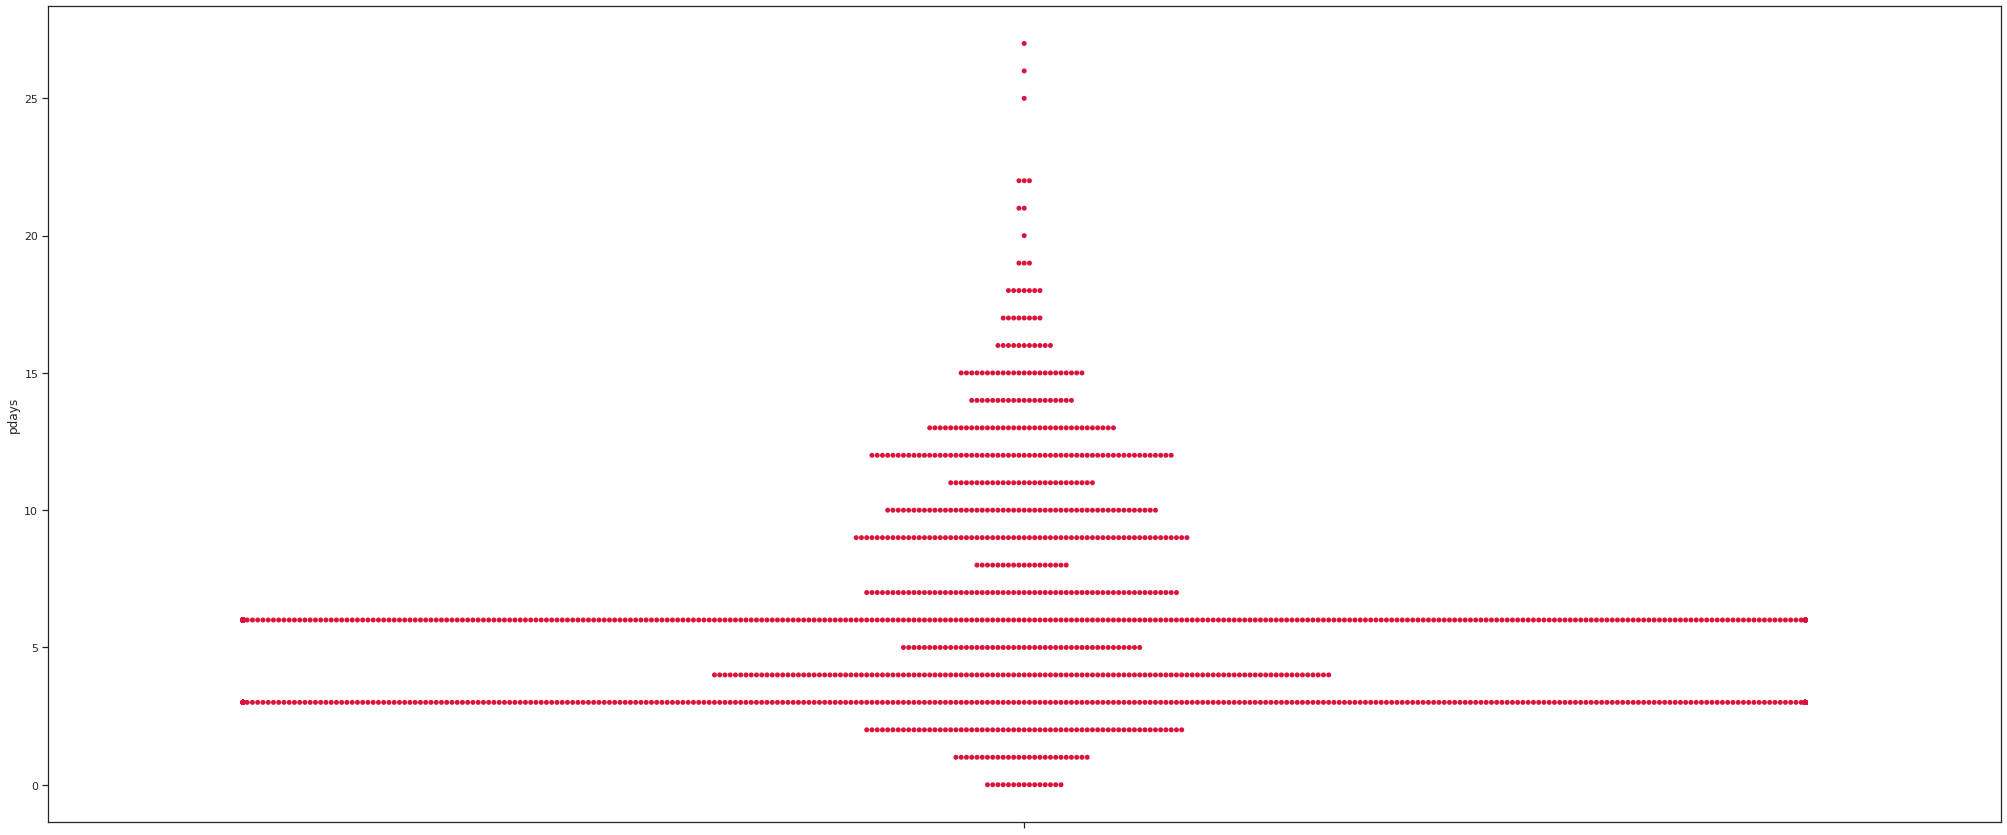

In [40]:
fig, ax = plt.subplots(1, figsize=(35, 15))

sns.swarmplot(data=camp['pdays'], y=camp['pdays'], color='crimson')

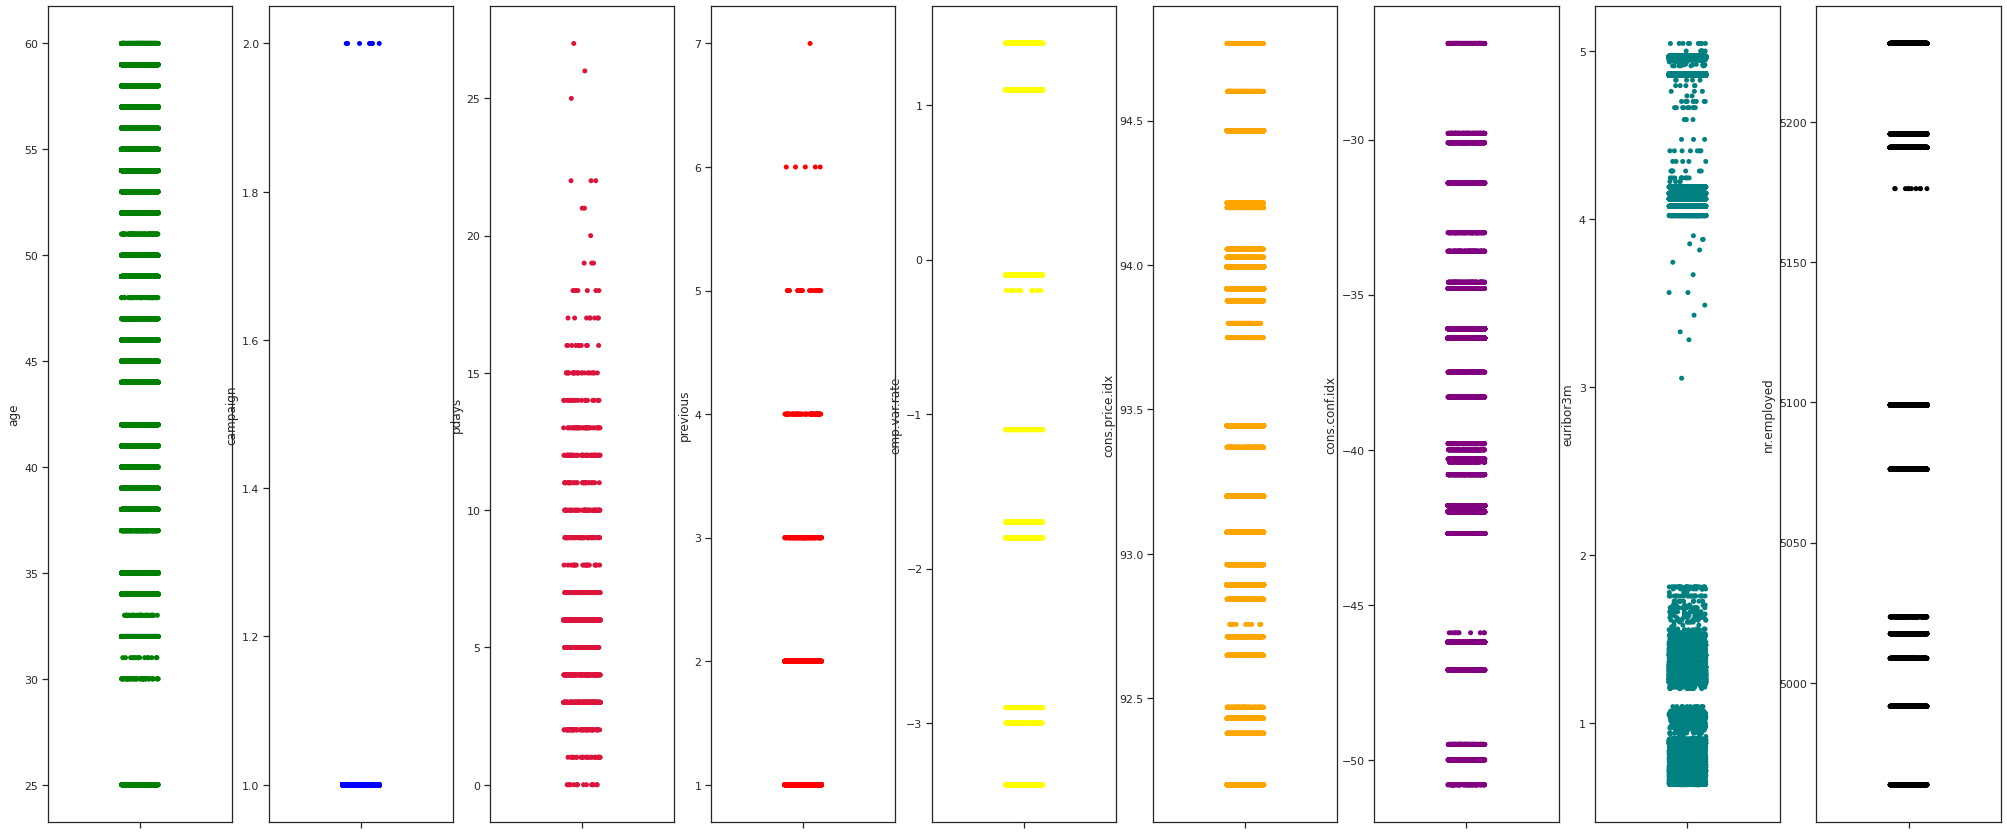

In [38]:
fig, axes = plt.subplots(1, 9, figsize=(35, 15))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

sns.stripplot(data=camp['age'], y=camp['age'], ax=ax1, color='green')
sns.stripplot(data=camp['campaign'], y=camp['campaign'], ax=ax2, color='blue')
sns.stripplot(data=camp['pdays'], y=camp['pdays'], ax=ax3, color='crimson')
sns.stripplot(data=camp['previous'], y=camp['previous'], ax=ax4, color='red')
sns.stripplot(data=camp['emp.var.rate'], y=camp['emp.var.rate'], ax=ax5, color='yellow')
sns.stripplot(data=camp['cons.price.idx'], y=camp['cons.price.idx'], ax=ax6, color='orange')
sns.stripplot(data=camp['cons.conf.idx'], y=camp['cons.conf.idx'], ax=ax7, color='purple')
sns.stripplot(data=camp['euribor3m'], y=camp['euribor3m'], ax=ax8, color='teal')
sns.stripplot(data=camp['nr.employed'], y=camp['nr.employed'], ax=ax9, color='black')

In [34]:
camp['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [39]:
camp['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

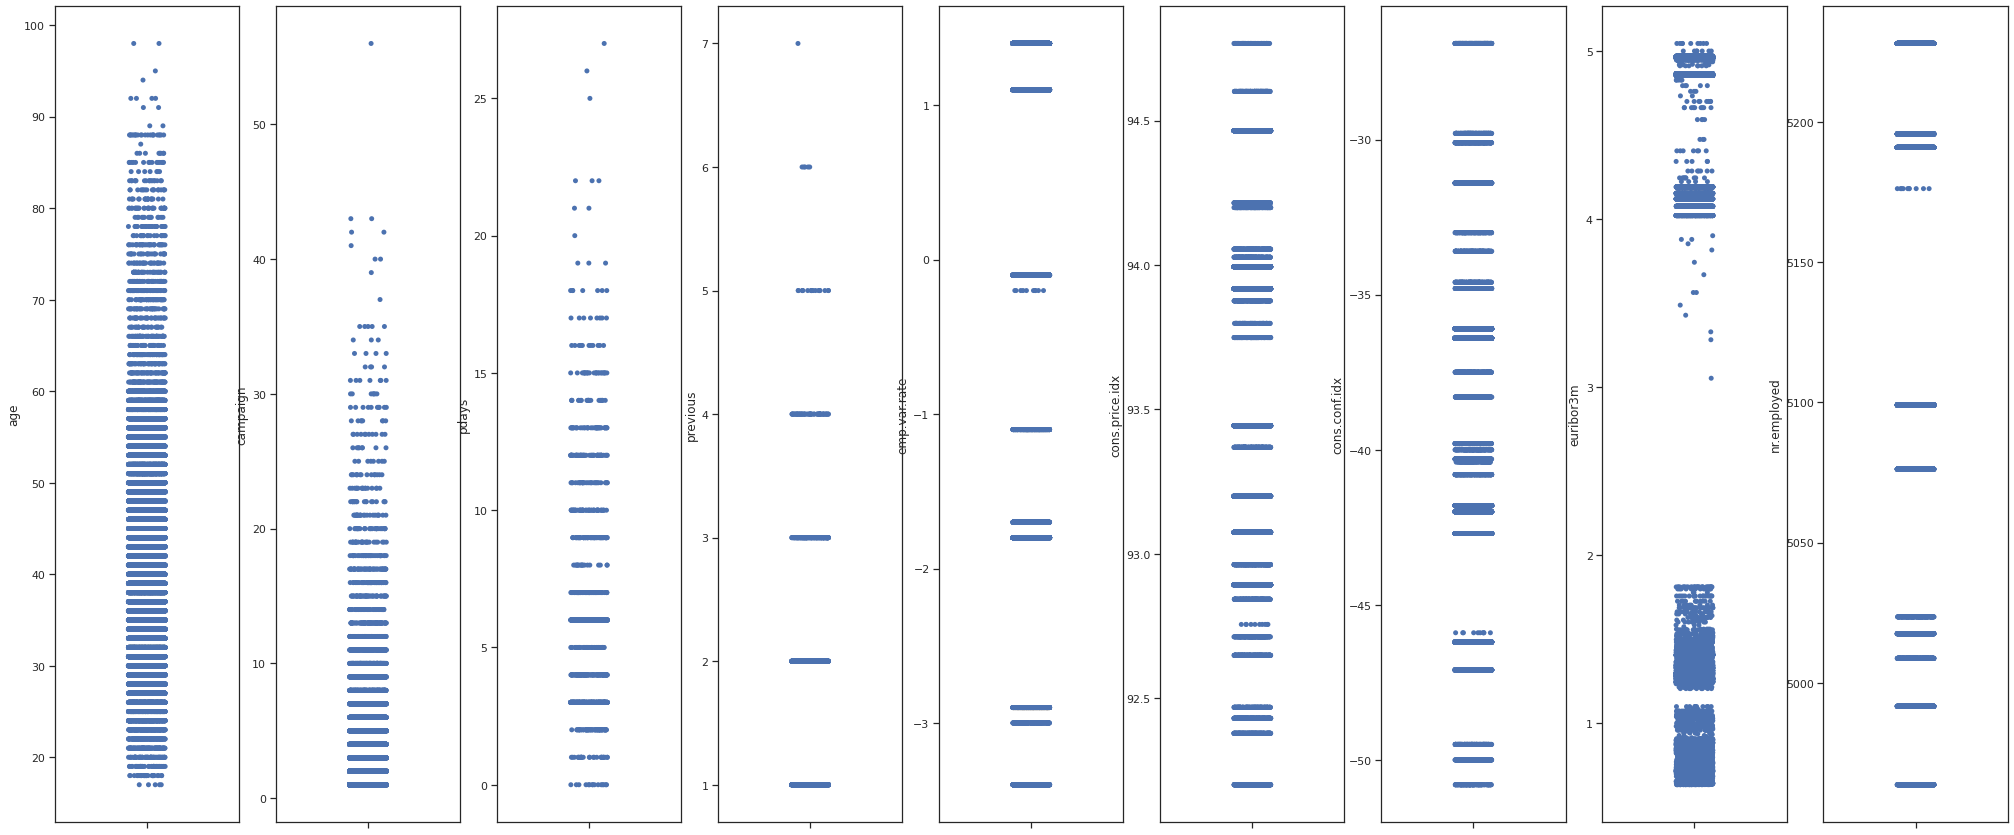

In [45]:
fig, axes = plt.subplots(1, 9, figsize=(35, 15))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

sns.stripplot(data=camp, y='age', ax=ax1, hue='y')
sns.stripplot(data=camp, y='campaign', ax=ax2, hue='y')
sns.stripplot(data=camp, y='pdays', ax=ax3, hue='y')
sns.stripplot(data=camp, y='previous', ax=ax4, hue='y')
sns.stripplot(data=camp, y='emp.var.rate', ax=ax5, hue='y')
sns.stripplot(data=camp, y='cons.price.idx', ax=ax6, hue='y')
sns.stripplot(data=camp, y='cons.conf.idx', ax=ax7, hue='y')
sns.stripplot(data=camp, y='euribor3m', ax=ax8, hue='y')
sns.stripplot(data=camp, y='nr.employed', ax=ax9, hue='y')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


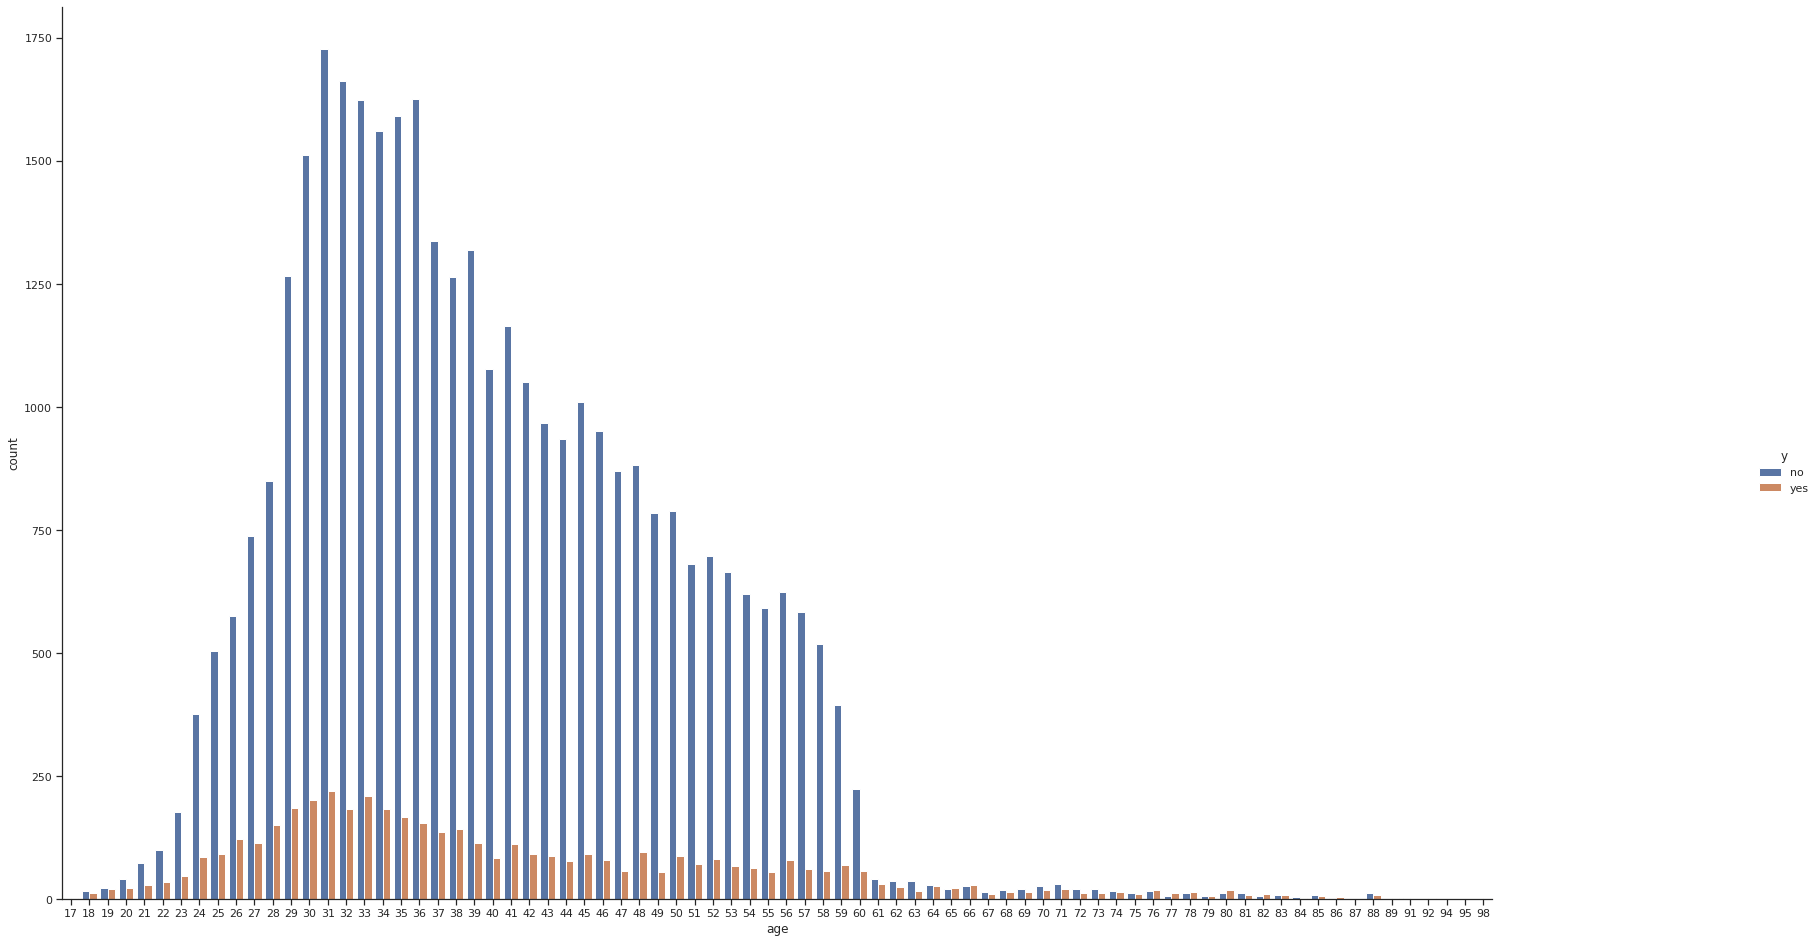

In [52]:
g=sns.catplot(data=camp, kind='count', ax=ax1, hue='y', x='age')
g.fig.set_size_inches(30,15)

In [71]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30, 15)

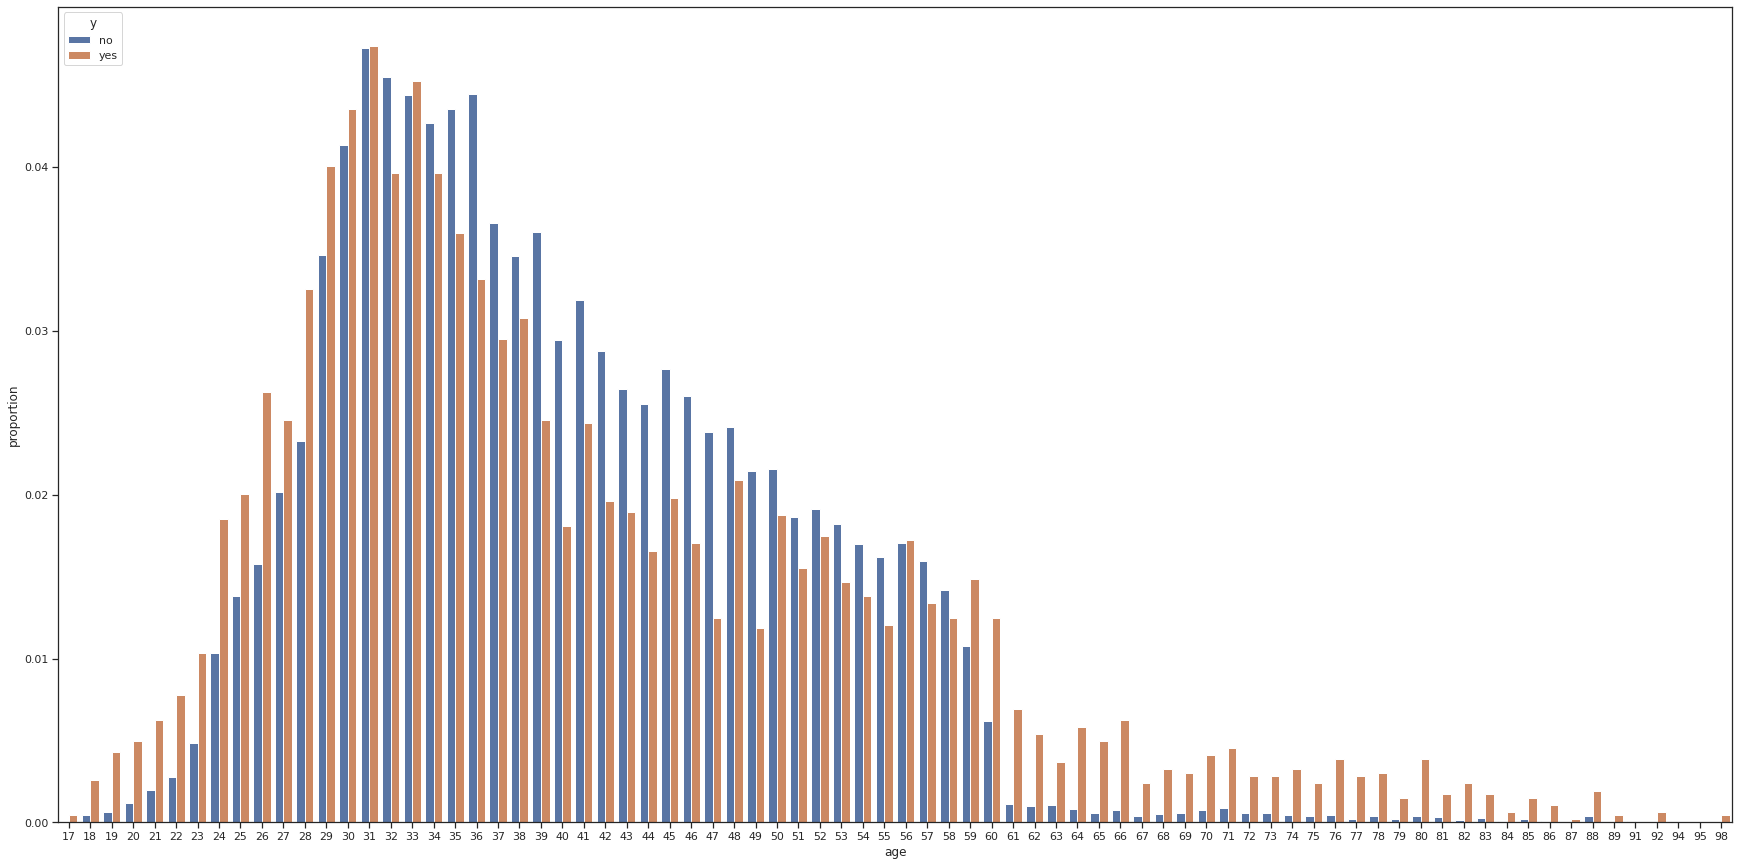

In [77]:
x, y, hue = "age", "proportion", "y"
hue_order = ["yes", "no"]

(camp[x]
 .groupby(camp[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

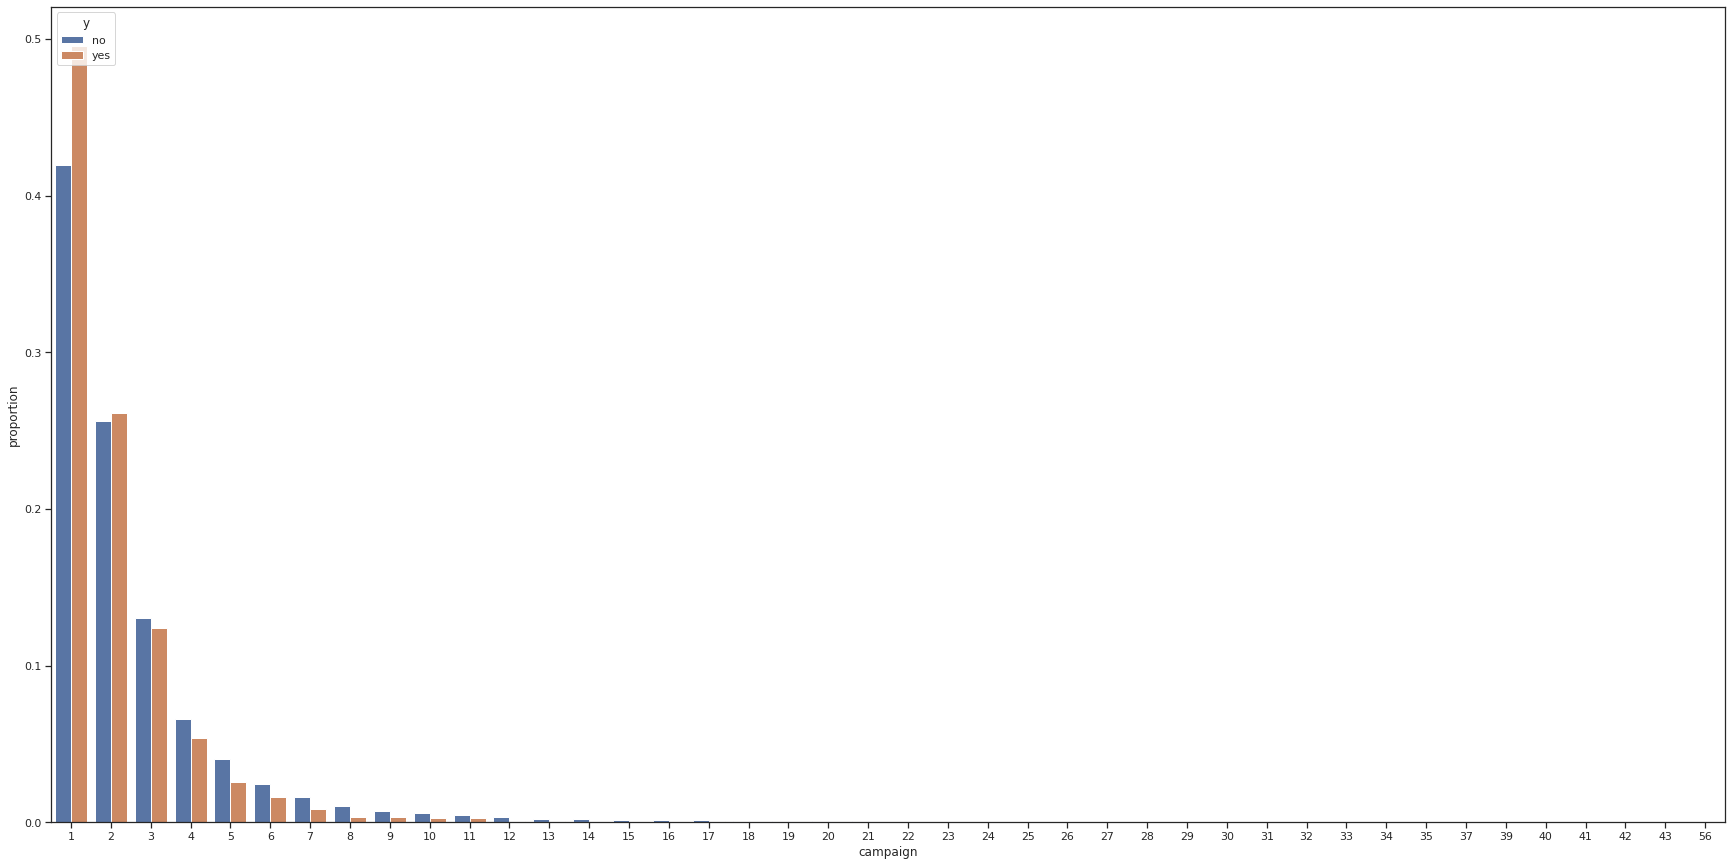

In [80]:
x, y, hue = "campaign", "proportion", "y"
hue_order = ["yes", "no"]

(camp[x]
 .groupby(camp[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

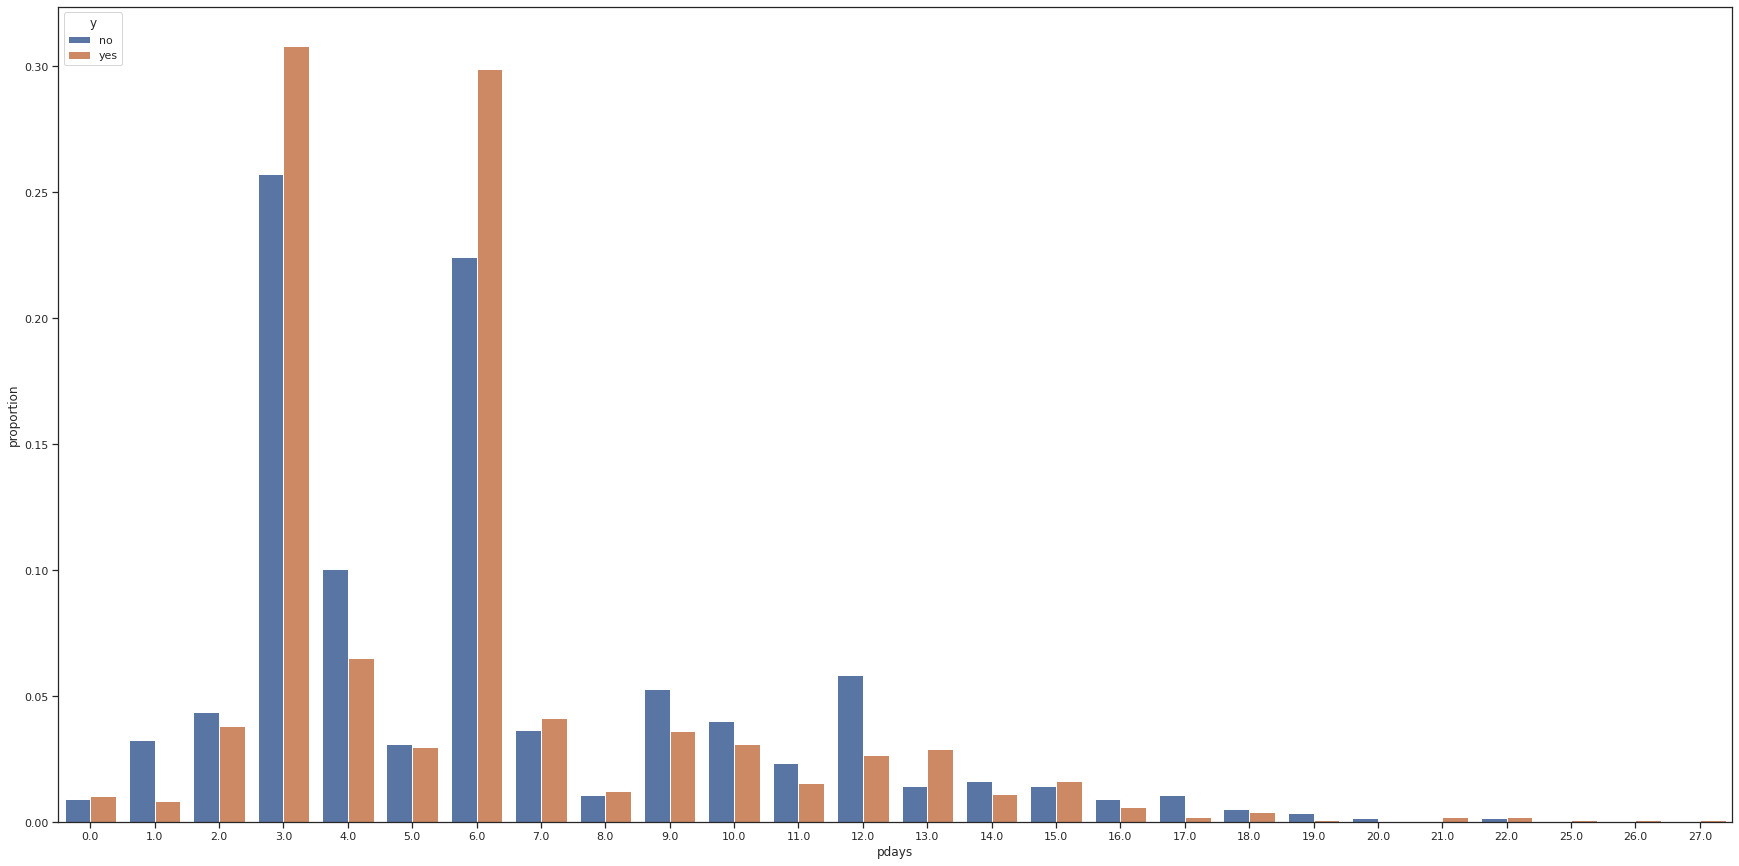

In [81]:
x, y, hue = "pdays", "proportion", "y"
hue_order = ["yes", "no"]

(camp[x]
 .groupby(camp[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

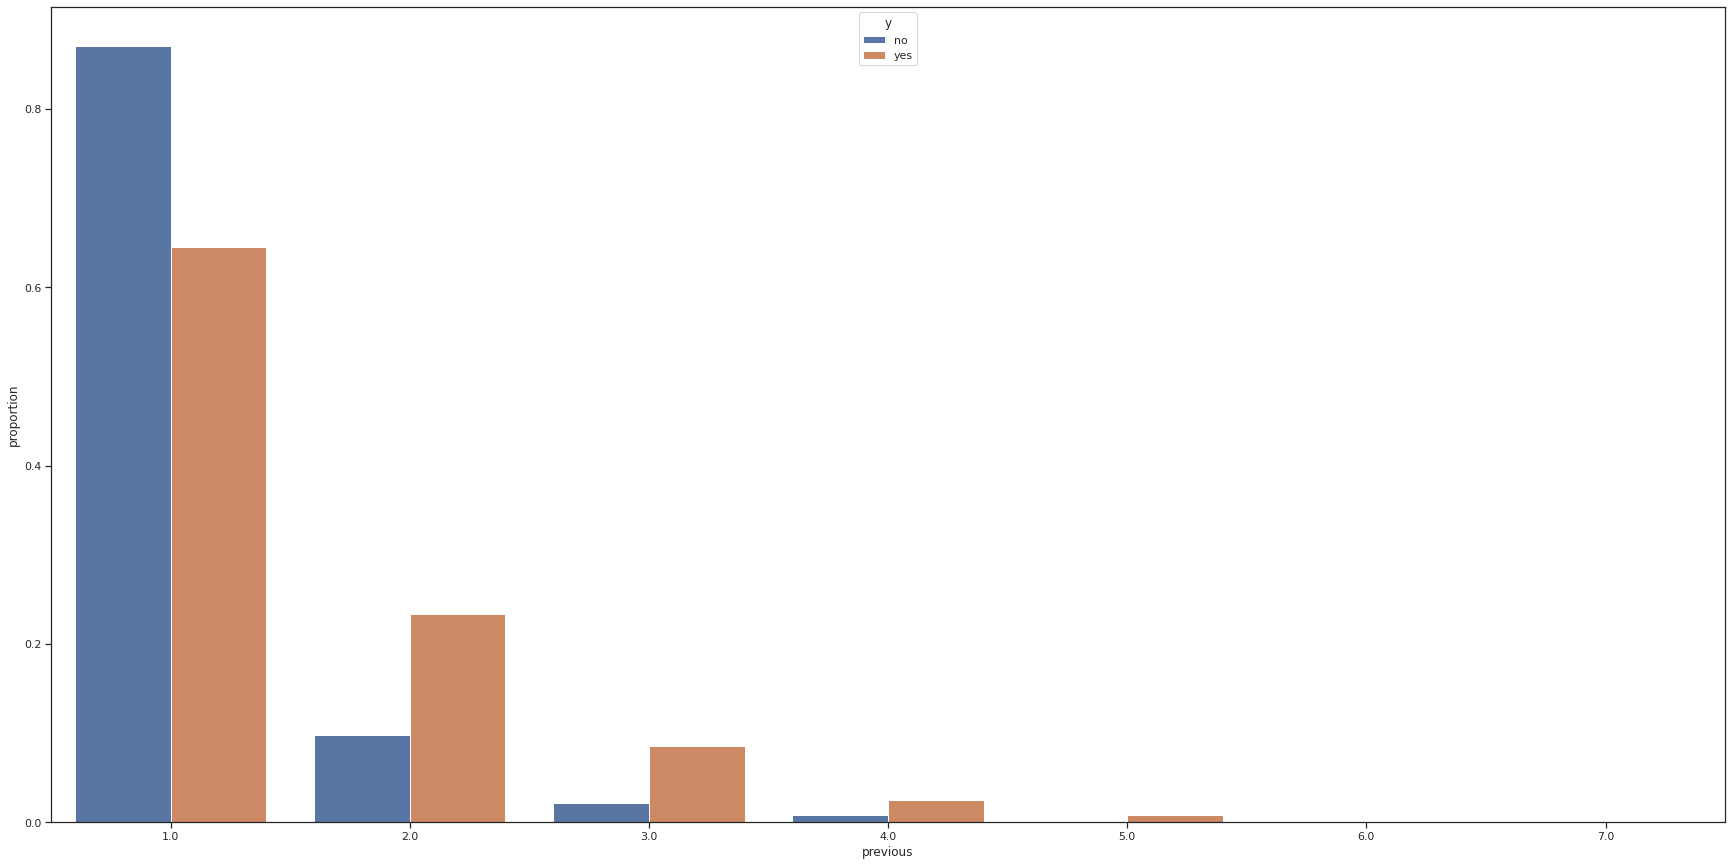

In [82]:
x, y, hue = "previous", "proportion", "y"
hue_order = ["yes", "no"]

(camp[x]
 .groupby(camp[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

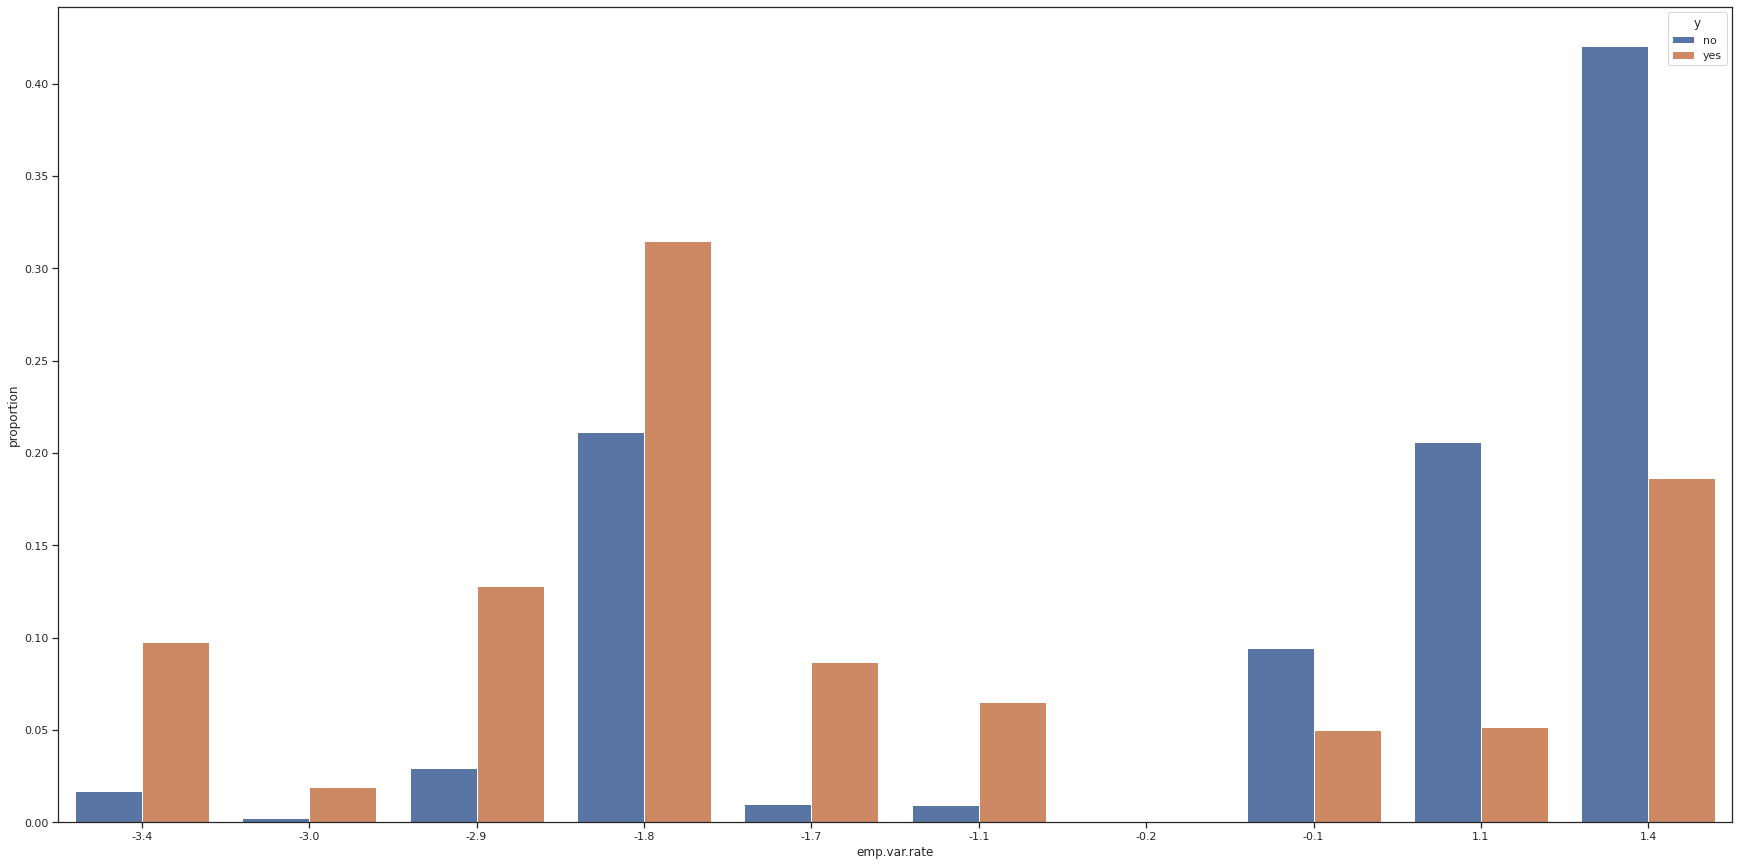

In [83]:
x, y, hue = "emp.var.rate", "proportion", "y"
hue_order = ["yes", "no"]

(camp[x]
 .groupby(camp[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

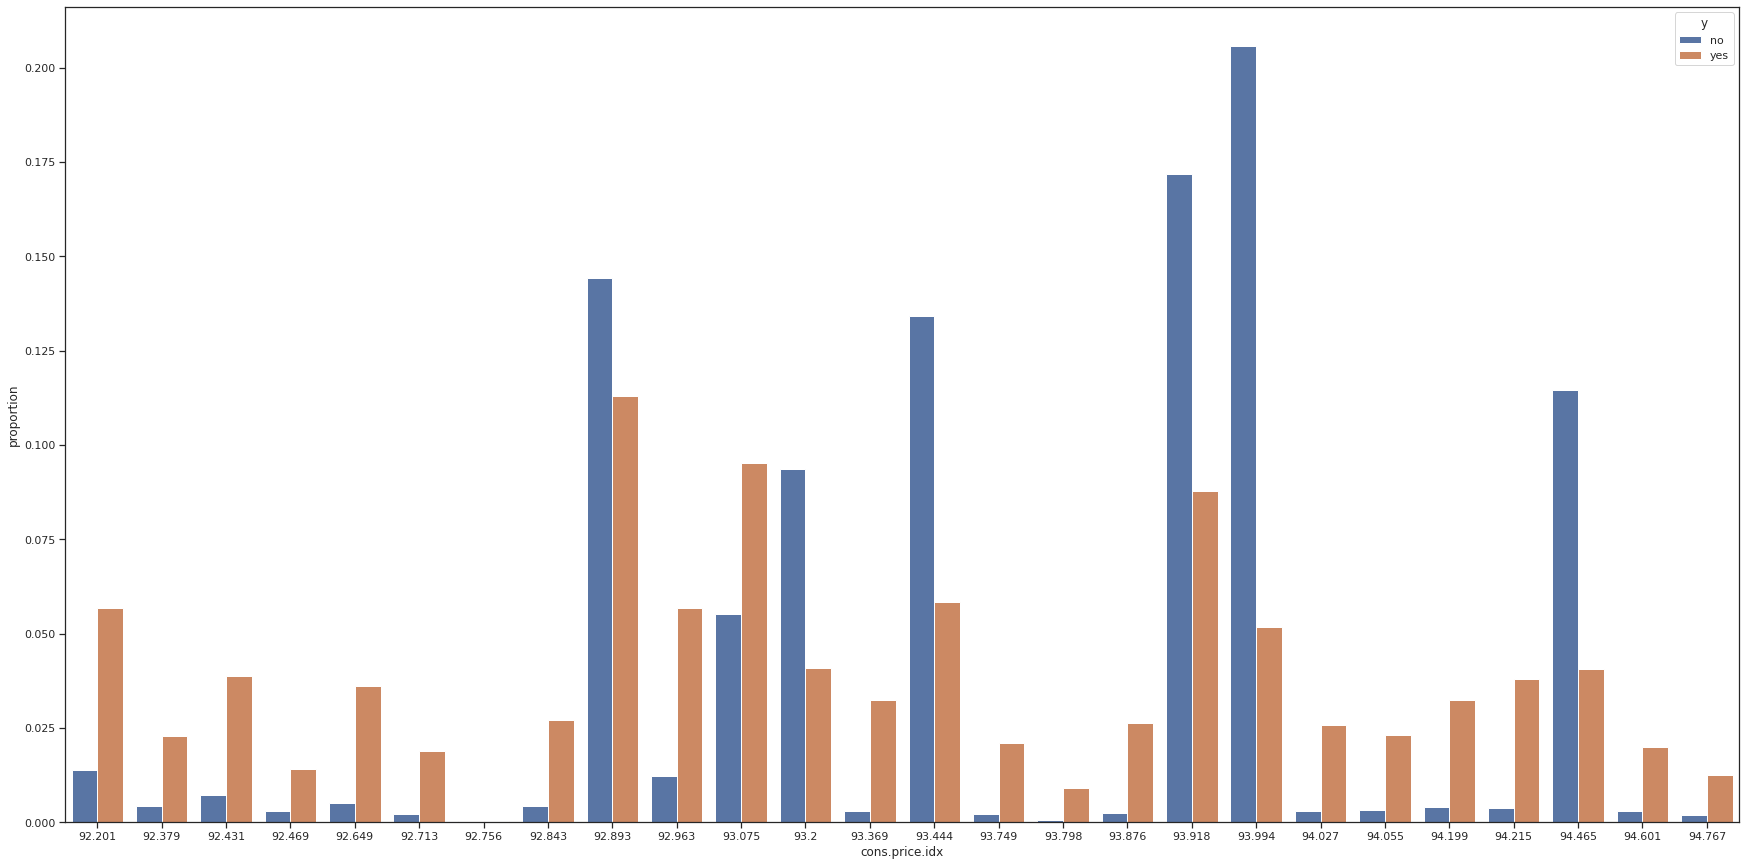

In [85]:
x, y, hue = "cons.price.idx", "proportion", "y"
hue_order = ["yes", "no"]

(camp[x]
 .groupby(camp[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

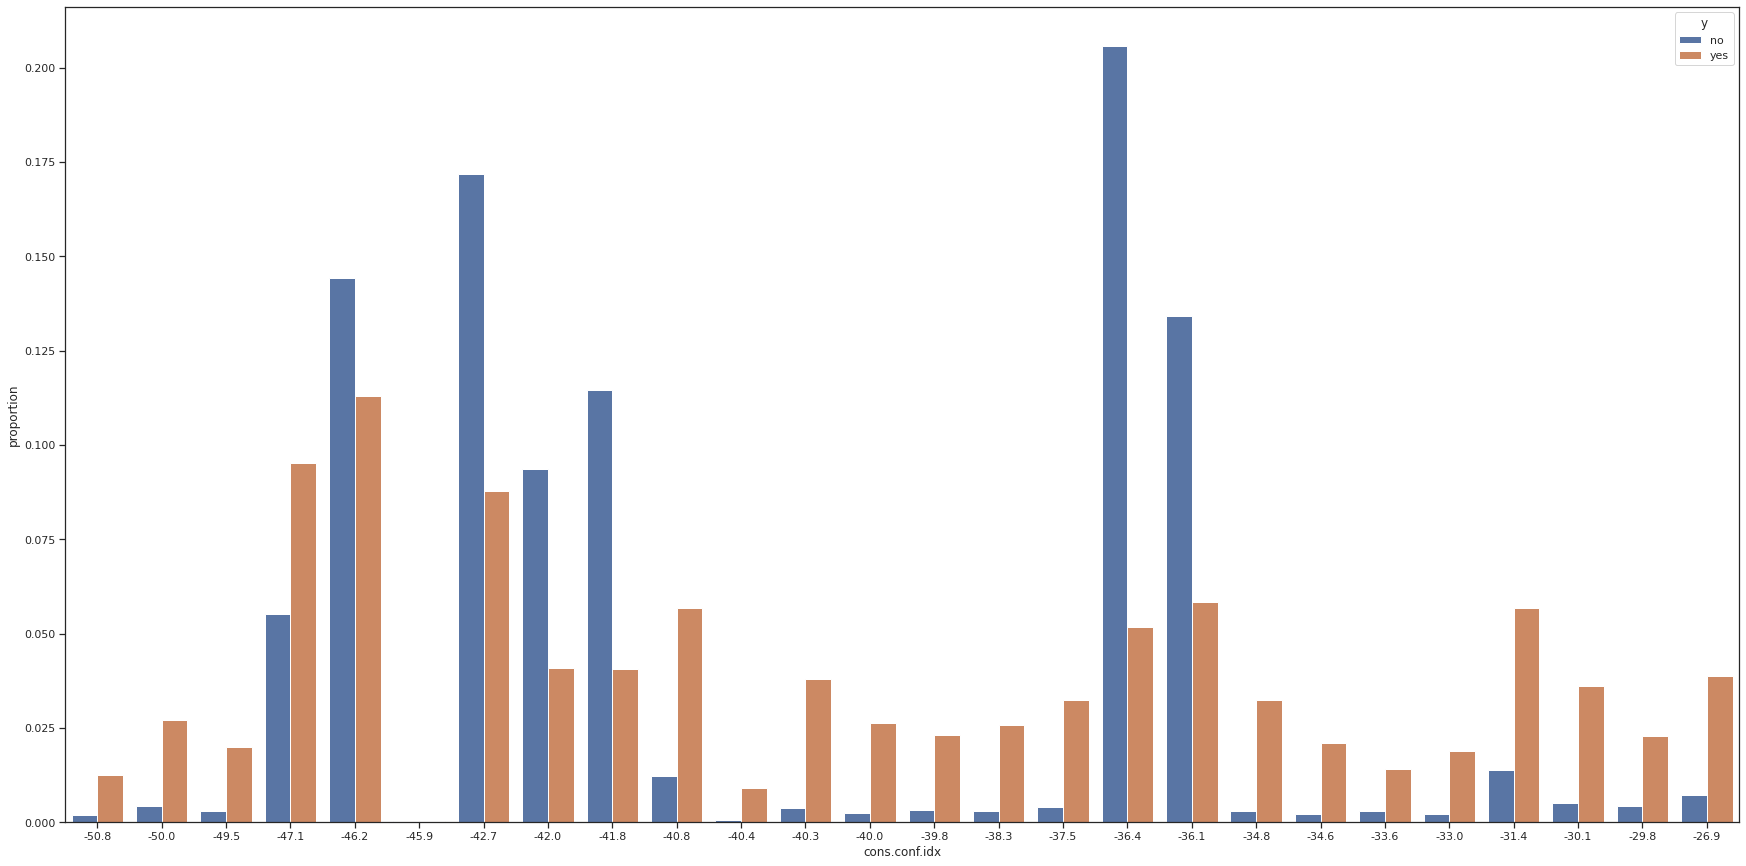

In [86]:
x, y, hue = "cons.conf.idx", "proportion", "y"
hue_order = ["yes", "no"]

(camp[x]
 .groupby(camp[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

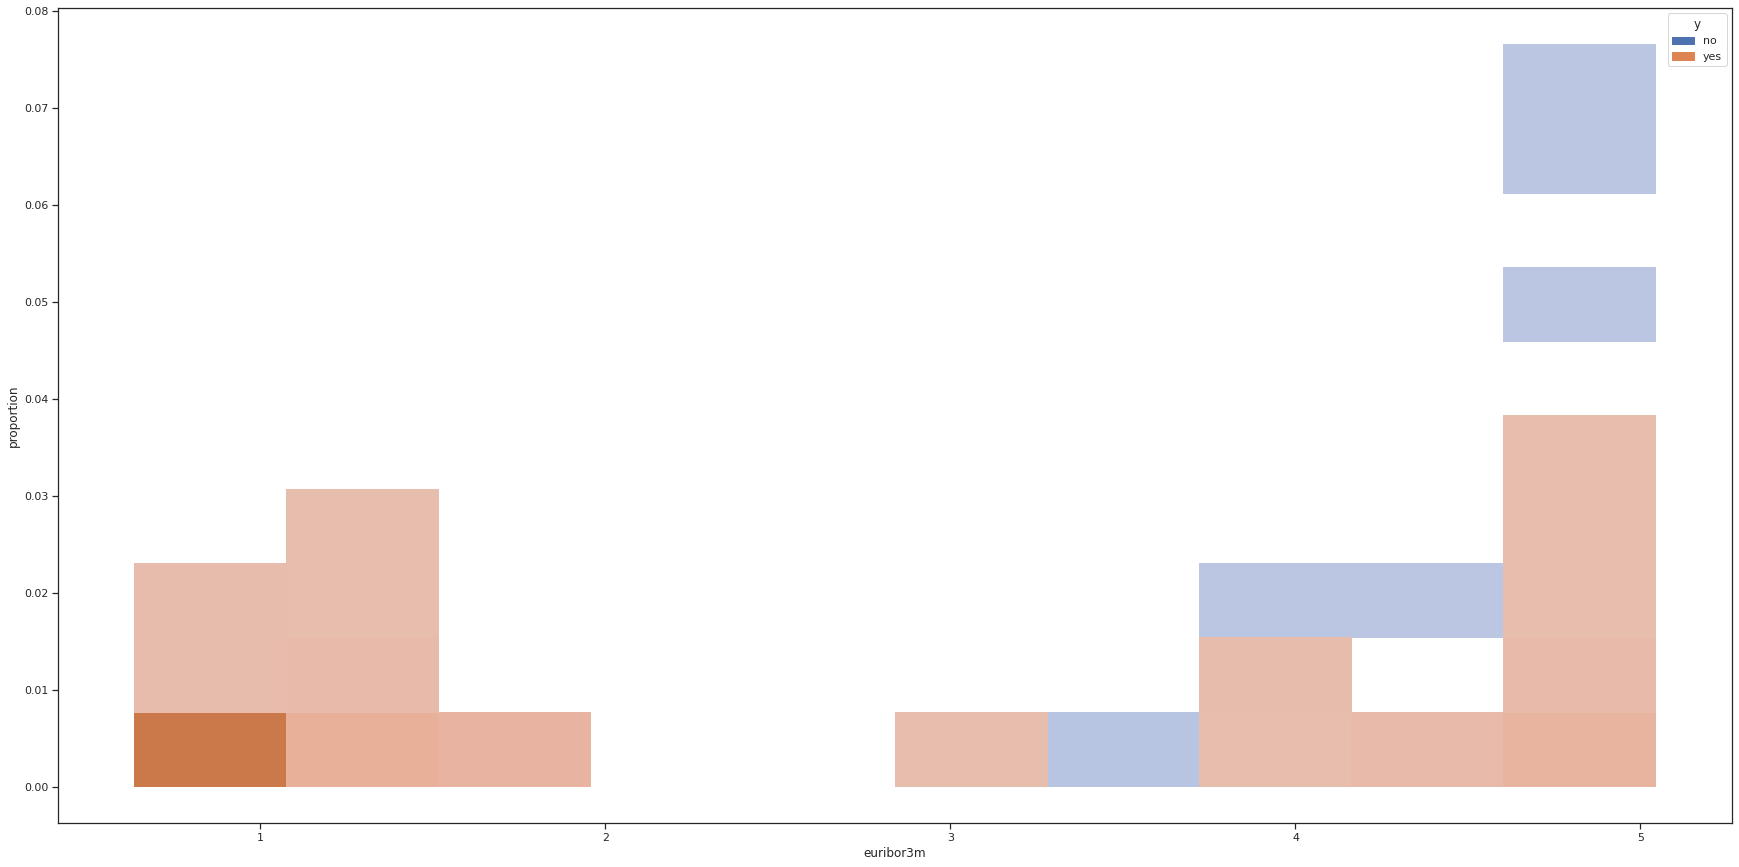

In [91]:
x, y, hue = "euribor3m", "proportion", "y"
hue_order = ["yes", "no"]

(camp[x]
 .groupby(camp[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.histplot, "data"), x=x, y=y, hue=hue, bins=10))

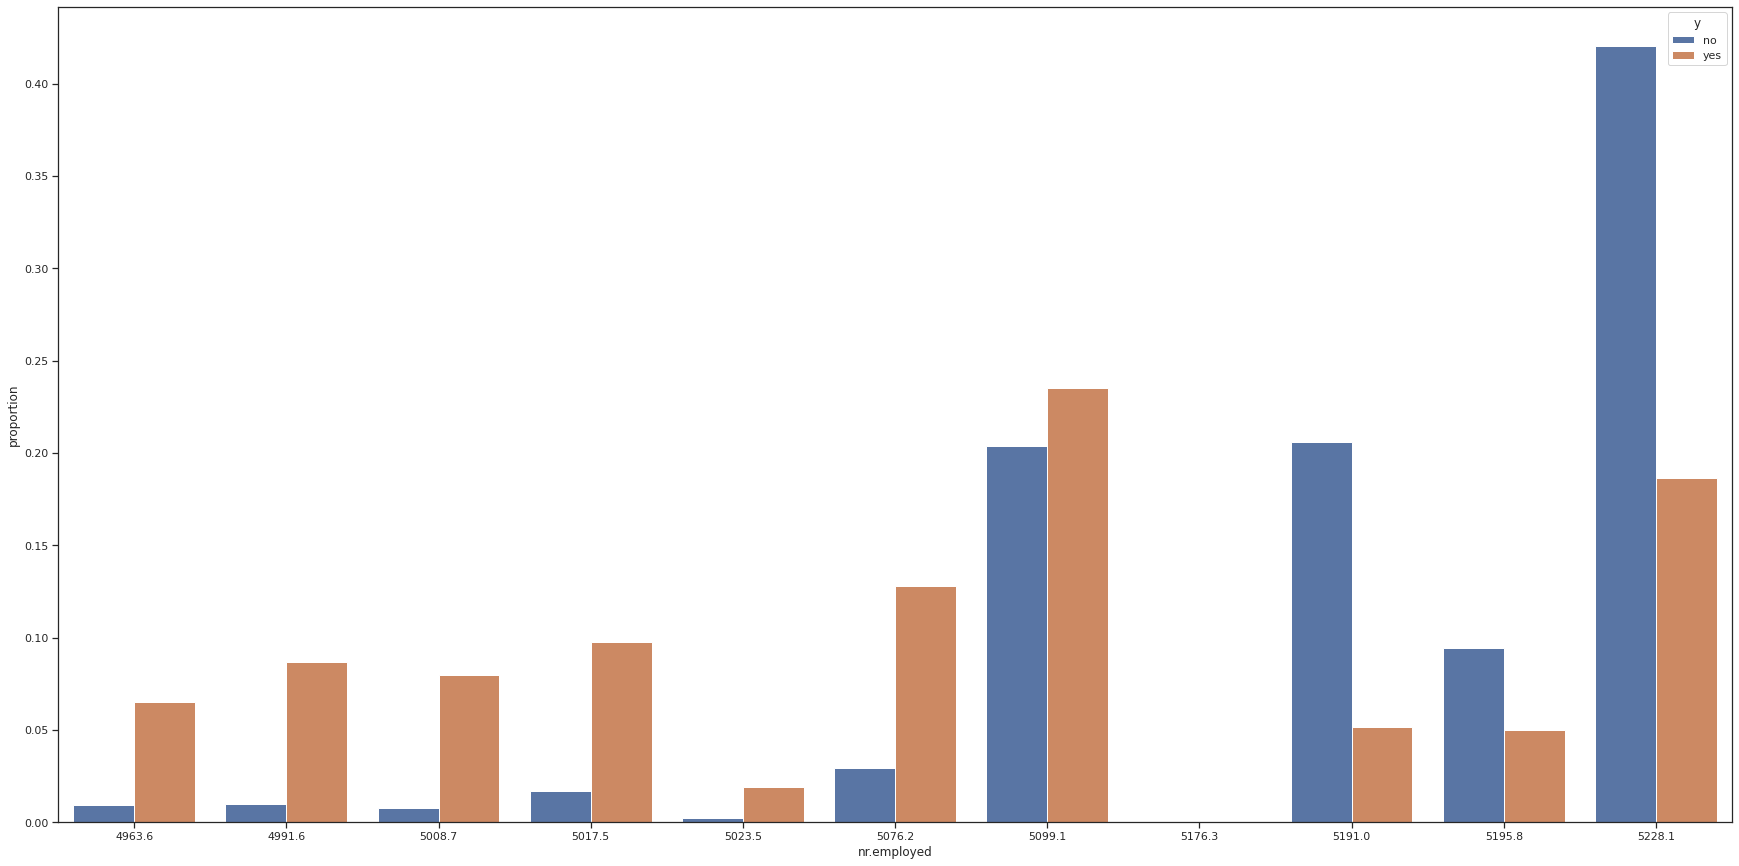

In [92]:
x, y, hue = "nr.employed", "proportion", "y"
hue_order = ["yes", "no"]

(camp[x]
 .groupby(camp[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [ ]:
sns.stripplot(data=campaign['previous'], y=campaign['previous'], ax=ax4, color='red')
sns.stripplot(data=campaign['emp.var.rate'], y=campaign['emp.var.rate'], ax=ax5, color='yellow')
sns.stripplot(data=campaign['cons.price.idx'], y=campaign['cons.price.idx'], ax=ax6, color='orange')
sns.stripplot(data=campaign['cons.conf.idx'], y=campaign['cons.conf.idx'], ax=ax7, color='purple')
sns.stripplot(data=campaign['euribor3m'], y=campaign['euribor3m'], ax=ax8, color='teal')
sns.stripplot(data=campaign['nr.employed'], y=campaign['nr.employed'], ax=ax9, color='black')